In [23]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [54]:
class Sheetly:

    # maps notes to vertical positions on the grid
    NOTE_MAP = {}

    def draw_staff(xbounds=[0,20],ybounds=[-1,15]):
        """
        returns the Figure and AxesSubplot associated with the staff plot

        Plot ranges from 0-10 in y and 0-10
        """

        fig, ax = plt.subplots()
        for i in range(5):
            ax.axhline(i,c='k')

        for i in range(5):
            ax.axhline(i+10,c='k')

        ax.set_aspect('equal')
        ax.set_ylim(ybounds)
        ax.set_xlim(xbounds)
        ax.axis('off')

        return fig, ax

    # TODO: make elliptical like actual note symbol
    def draw_notes(notes, ax, duration=None, xvals=None):
        """
        Draws a Circle patch note on the ax passed in

        Args:
            note: the list note(s) to be plotted, e.g. A4 (?)
            the position of the note on the staff is determined
            by a dictionary.
            xvals: the list of x location(s) on the staff. defaults 
            to center of ax if not specified 
        """

        if xvals == None:
            x1,x2 = ax.get_xlim()
            xvals = [(x1+x2/2)]*len(notes)
        
        # hardcoded for test. change later.
        for note, x in zip(notes, xvals):
            ax.add_patch(Circle((x,11),0.5,color='k'))
            
    def record_result():
        # could write answers and responses to file for generating
        # learning stats
        pass

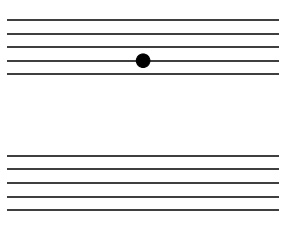

In [55]:
fig, ax = draw_staff()
draw_note('C', ax)